## Project Name - Uber Supply Demand Gaps

##### Project Type - EDA

##### Contribution - Individual

## Project Summary 

The aim of this project is to perform Exploratory Data Analysis (EDA) on Uber request data. The data reveals a gap between the demand and supply of Uber services. The goal of this analysis is to visualize the data and uncover insights that can help bridge this gap between demand and supply.

About the Dataset, The dataset consists of a single CSV file named uber_request_data.csv, which contains 6,745 records and 10 columns. The column names are: request_id, pickup_point, driver_id, status, request_timestamp, request_time, request_time_status, drop_timestamp, drop_time, and drop_time_status.



#### GitHub Link - https://github.com/varshapal/Uber_demand_supply_gaps/blob/main/uber_request_data_analysis.ipynb

## Problem Statement

There is a gap between demand and supply in Uber services. Many requests are canceled during the early morning and late-night hours. Additionally, cars are often unavailable during these times. This indicates a significant mismatch between demand and supply during odd hours.


### Business Objective

The business objective is to address the demand and supply gap in Uber services during odd hours, such as early morning and late night. The aim is to reduce request cancellations and instances of no cars being available during these times. Ultimately, the goal is to bridge the demand-supply gap and support the growth of the business.

## Know Your Data

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load dataset
df = pd.read_csv('dataset/uber_request_data.csv')

In [15]:
# dataset first view
df.head()

,request_id,pickup_point,driver_id,status,request_timestamp,request_time,request_time_status,drop_timestamp,drop_time,drop_time_status
0,619,Airport,1,Trip Completed,11-07-2016 11:51,11:51,Morning,11-07-2016 13:00,13:00,Afternoon
1,867,Airport,1,Trip Completed,11-07-2016 17:57,17:57,Evening,11-07-2016 18:47,18:47,Evening
2,1807,City,1,Trip Completed,12-07-2016 09:17,09:17,Morning,12-07-2016 09:58,09:58,Morning
3,2532,Airport,1,Trip Completed,12-07-2016 21:08,21:08,Night,12-07-2016 22:03,22:03,Night
4,3112,City,1,Trip Completed,13-07-2016 08:33,08:33,Morning,13-07-2016 09:25,09:25,Morning


In [16]:
# dataset last 5 records
df.tail()

,request_id,pickup_point,driver_id,status,request_timestamp,request_time,request_time_status,drop_timestamp,drop_time,drop_time_status
6740,6745,City,279,No Cars Available,15-07-2016 23:49,23:49,Night,16-07-2016 00:44,00:44,Late Night
6741,6752,Airport,279,No Cars Available,15-07-2016 23:50,23:50,Night,16-07-2016 00:45,00:45,Late Night
6742,6751,City,279,No Cars Available,15-07-2016 23:52,23:52,Night,16-07-2016 00:47,00:47,Late Night
6743,6754,City,279,No Cars Available,15-07-2016 23:54,23:54,Night,16-07-2016 00:49,00:49,Late Night
6744,6753,Airport,279,No Cars Available,15-07-2016 23:55,23:55,Night,16-07-2016 00:50,00:50,Late Night


In [17]:
# dataset rows and columns count
df.shape

(6745, 10)

In [19]:
# dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   request_id           6745 non-null   int64 
 1   pickup_point         6745 non-null   object
 2   driver_id            6745 non-null   int64 
 3   status               6745 non-null   object
 4   request_timestamp    6745 non-null   object
 5   request_time         6745 non-null   object
 6   request_time_status  6745 non-null   object
 7   drop_timestamp       6745 non-null   object
 8   drop_time            6745 non-null   object
 9   drop_time_status     6745 non-null   object
dtypes: int64(2), object(8)
memory usage: 527.1+ KB


In [9]:
# dataset duplicate value count
df.duplicated().sum()

np.int64(0)

In [10]:
# missing value count
df.isnull().sum()

request_id             0
pickup_point           0
driver_id              0
status                 0
request_timestamp      0
request_time           0
request_time_status    0
drop_timestamp         0
drop_time              0
drop_time_status       0
dtype: int64

In [11]:
# dataset columns
df.columns

Index(['request_id', 'pickup_point', 'driver_id', 'status',
       'request_timestamp', 'request_time', 'request_time_status',
       'drop_timestamp', 'drop_time', 'drop_time_status'],
      dtype='object')

In [13]:
# dataset columns datatype
df.dtypes

request_id              int64
pickup_point           object
driver_id               int64
status                 object
request_timestamp      object
request_time           object
request_time_status    object
drop_timestamp         object
drop_time              object
drop_time_status       object
dtype: object

## Data Visualization, Storytelling & Experimenting with Charts: Understand the relationships between variables 

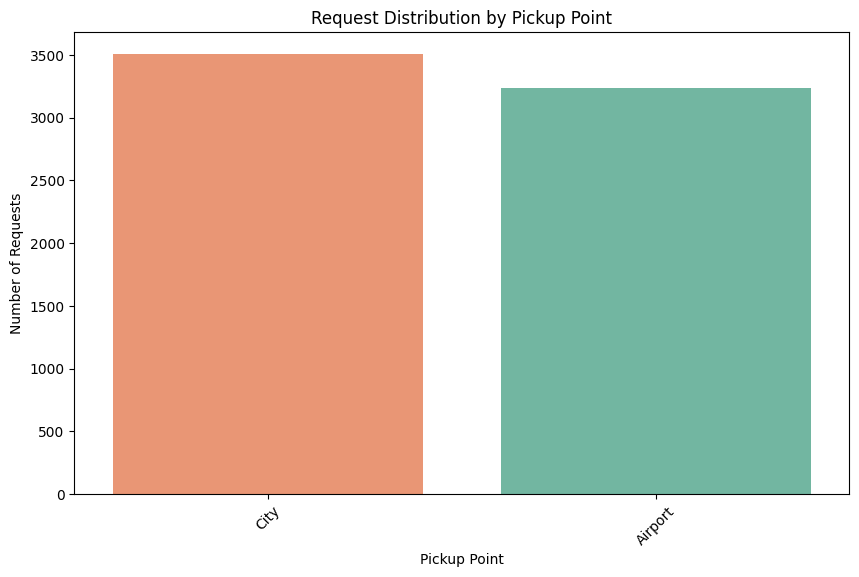

In [33]:
# Request data distribution by pickup point
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='pickup_point', order=df['pickup_point'].value_counts().index, hue='pickup_point', palette='Set2', legend=False)
plt.title('Request Distribution by Pickup Point')
plt.xlabel('Pickup Point')
plt.ylabel('Number of Requests')
plt.xticks(rotation=45)
plt.show()

1. Why did you pick this specific chart? A bar chart is the best way to show the frequency distribution of categorical data.

2. What is/are the insight(s) found from the chart? It shows which pickup points have high and low demand. The City pickup point has higher demand than the Airport.

3. Will the gained insights help creating a positive business impact? Yes, definitely. With the help of insights, we can make informed decisions to grow the business—for example, by deploying more drivers at high-demand pickup points and offering discounts at low-demand locations.

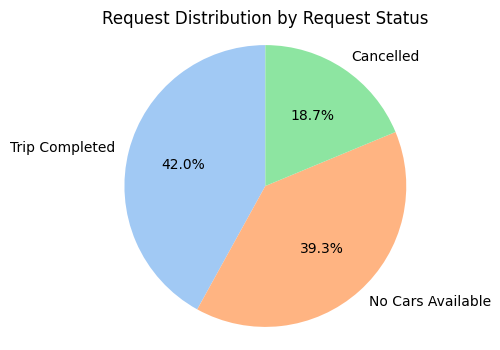

In [36]:
# Request Distribution by Request Status
status_counts = df['status'].value_counts()
plt.figure(figsize=(4,4))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Request Distribution by Request Status')
plt.axis('equal')
plt.show()

1. Why did you pick this specific chart? A pie chart visually represents the percentage or portion of each status as part of the whole dataset. It provides a quick comparison of the share of each status.

2. What is/are the insight(s) found from the chart? The chart shows that the 'Trip Completed' status is the highest, followed closely by 'No Cars Available'. The insight gained is: 42% of requests were completed, 39.3% had no cars available, and 18.7% were cancelled.

3. Will the gained insights help creating a positive business impact? Yes, with help of gained insights we can do some changes and get better results, like increase the car availability and increase the number of drivers so that drive not cancelled, less cancellition and car availabily will improve the trip completion and boost the business.

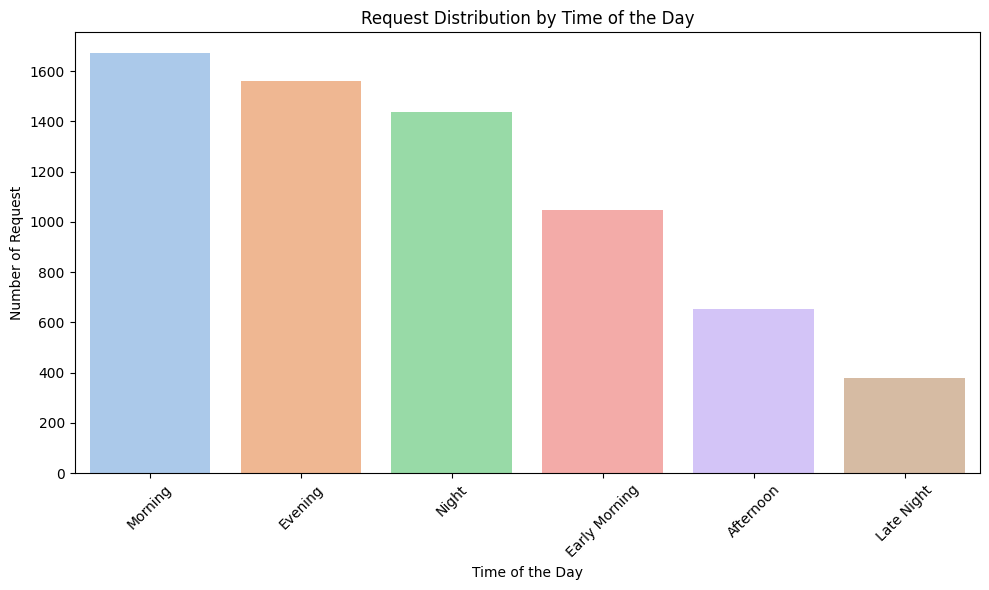

In [5]:
# Request Distribution by Time of the Day
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='request_time_status', order=df['request_time_status'].value_counts().index, hue='request_time_status', palette='pastel', legend=False)
plt.title('Request Distribution by Time of the Day')
plt.xlabel('Time of the Day')
plt.ylabel('Number of Request')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

1. Why did you pick this specific chart? Bar chart is best for camparing the frequency of catogorical data. 

2. What is/are the insight(s) found from the chart? In morning request is highest and in late night request is lowest. Early morning and late night requests are low. Morning and Evening is peak time.

3. Will the gained insights help creating a positive business impact? Yes, with the help of insights we can modification accordingly like allocate more drivers in morning and evening time, and reduce the drivers number early morning and late night. Apply discount and safty features for late night request can increase the night and late night request. All these can improve the business growth.

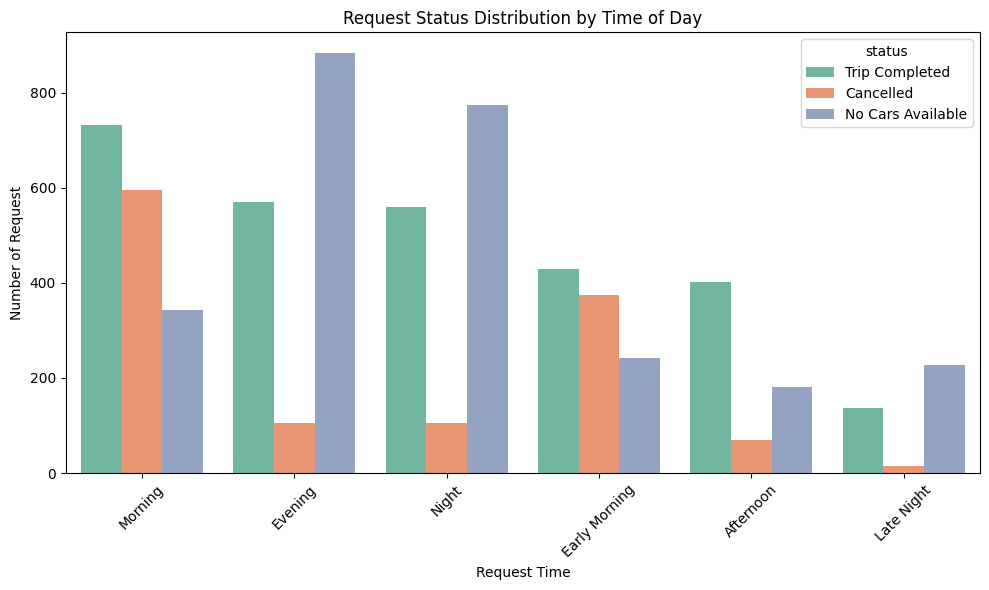

In [9]:
# Request Status Distribution by Time of Day  
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='request_time_status', hue='status', palette='Set2')
plt.title('Request Status Distribution by Time of Day')
plt.xlabel('Request Time')
plt.ylabel('Number of Request')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

1. Why did you pick this specific chart? Bar chart is best for camparing the frequency of catogorical data.

2. What is/are the insight(s) found from the chart? Trip Completed maximum in morning and minimum in late night, No Cars Available maximum in evening, minimum in afternoon, cancelled request maximum in morning and minimum in late night. car not available mostly in evening and night. Request cancelled in morning and early morning. 

3. Will the gained insights help creating a positive business impact? absolutly if we apply some changes accoring to gained insights such as request cancelled in morning and early morning maximum so increase the number of drivers and cars in morning time. No car availability is maximum in evening and night so can increse the number of cars in evening and night time with best safty features. Apply discount on advance booking for early morning and late night. All these can boost business growth.

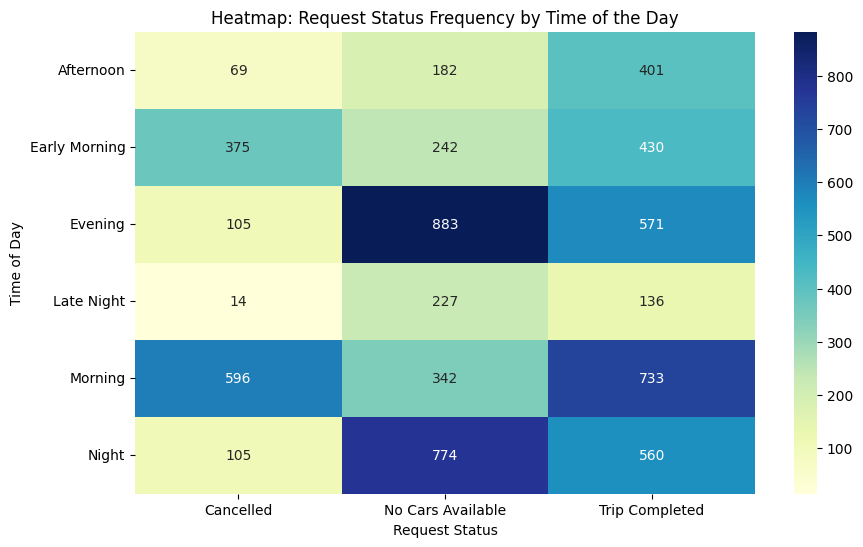

In [21]:
# Heatmap Status Frequency Across Time Slot
heatmap_data = pd.crosstab(df['request_time_status'], df['status'])
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap: Request Status Frequency by Time of the Day')
plt.xlabel('Request Status')
plt.ylabel('Time of Day')
plt.show()

1. Why did you pick this specific chart? Heatmap is ideal for showing frequency pattern in two catogorical variables. Color intensity quickly highlights where the values are highest or lowest.

2. What is/are the insight(s) found from the chart? Highly Cancelled request in early morning and morning. No car availability is high in evening and night. Trip completion minimum in late night.

3. Will the gained insights help creating a positive business impact? Definitly,  do some changes accoring to gained insights and boost the business growth.

2. What is/are the insight(s) found from the chart? In morning and 

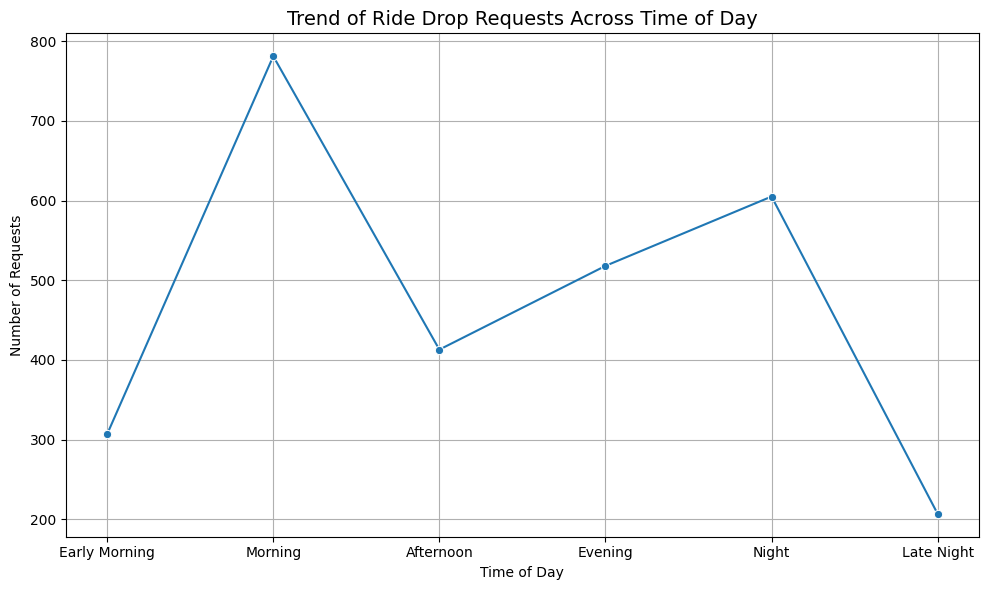

In [7]:
plt.figure(figsize=(10, 6))
time_order = ['Early Morning', 'Morning', 'Afternoon', 'Evening', 'Night', 'Late Night']
df['drop_time_status'] = pd.Categorical(df['drop_time_status'], categories=time_order, ordered=True)
daily_requests = df.groupby('drop_time_status', observed=True)['request_id'].count().reset_index()
sns.lineplot(data=daily_requests, x='drop_time_status', y='request_id', marker='o')
plt.title('Trend of Ride Drop Requests Across Time of Day', fontsize=14)
plt.xlabel('Time of Day')
plt.ylabel('Number of Requests')
plt.grid(True)
plt.tight_layout()
plt.show()

1. Why did you pick this specific chart? Line chart is good for showing trends of data changing with time.

2. What is/are the insight(s) found from the chart? In morning and night drop request is high, in early morning, late night and afternoon drop request are low.

3. Will the gained insights help creating a positive business impact? Yes, gained insights will help definitly for growing business, if apply some changes such as morning and night drop request is high because it's a work/office time, increase the number of drivers and cars in this time duration and give some extra benifits to those driver who complete maximum rides. For incrasing the drop request in early morning and late night provide best safty features and deduct price from normal price.

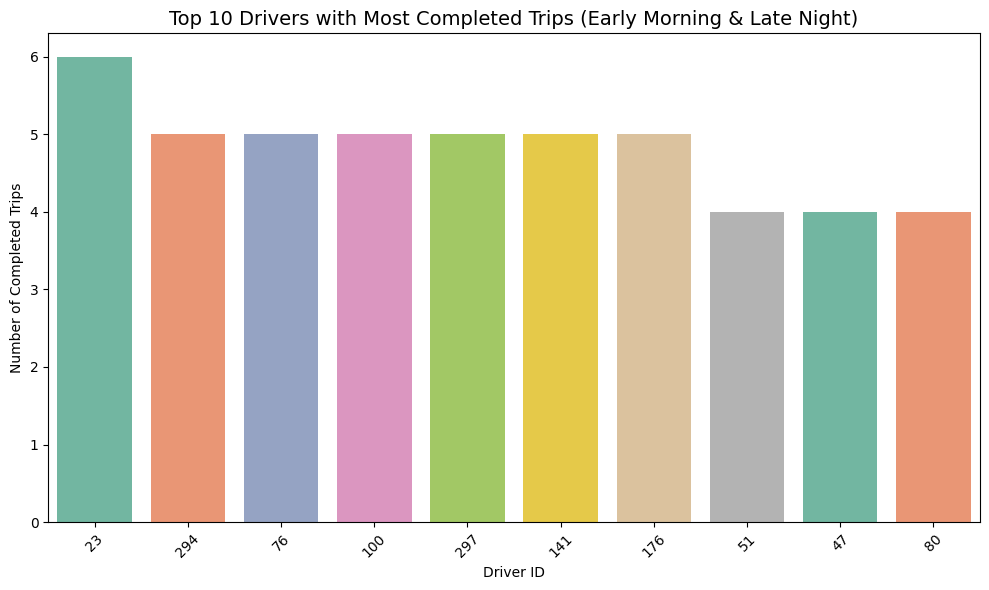

In [5]:
filtered_df = df[
    (df['status'] == 'Trip Completed') &
    (df['request_time_status'].isin(['Early Morning', 'Late Night']))
]
top_driver_data = filtered_df['driver_id'].value_counts().head(10).reset_index()
top_driver_data.columns = ['driver_id', 'completed_trips']
plt.figure(figsize=(10, 6))
sns.barplot(data=top_driver_data, x='driver_id', y='completed_trips', hue='driver_id', palette='Set2', order=top_driver_data['driver_id'], legend=False)
plt.title('Top 10 Drivers with Most Completed Trips (Early Morning & Late Night)', fontsize=14)
plt.xlabel('Driver ID')
plt.ylabel('Number of Completed Trips')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

1. Why did you pick this specific chart? This bar chart clearly visualize the which driver_id maximum trip complete in odd times. Bar chart is best chices for visualize the frequency of data.

2. What is/are the insight(s) found from the chart? This chart gives the insight is driver_id 23 complete the maximum trip in early morning and late night. Top 10 driver ids are which complete the higher trips then other drier_ids in early morning and late night.

3. Will the gained insights help creating a positive business impact? Definitly, insights tells the which drivers are working in late night and early morning. Uber must appricate these drivers and provide some extra facilities, safty and payment for their motivation. Increment of drivers services in late night and early morning will reduce the request cancellion and increase the trip completion.

## Solution to Business Objective

The main objective of this project is to identify how to bridge the gap between demand and supply in Uber services.

After analyzing the data, it was observed that ride and drop requests are relatively low during the early morning and late-night hours. This is mainly due to high cancellation rates and unavailability of cars, possibly caused by limited driver availability or other operational issues.

Based on these insights, Uber can take the following actions:

Deploy more drivers and vehicles during early morning and late-night hours.

Offer additional incentives or bonuses to drivers who complete rides during these off-peak times to reduce cancellations.

Encourage users to book rides during low-demand hours by offering price discounts and enhanced safety features.

Implementing these solutions can help close the demand-supply gap and contribute to Uber’s business growth.

## Conclusion

The analysis shows that ride requests are mostly made during the morning and evening hours, with the City being the higher pickup point compared to the Airport. Drop requests are also high in the morning and evening, but low during the early morning and late-night hours.

Regarding ride request status: 42% of requests are completed, 39.3% face the issue of no cars available, and 18.7% are cancelled. Trip completion is highest in the morning and lowest at night. The number of requests with no cars available is highest in the evening and night. Ride cancellations are most common in the morning and early morning.

For drop requests: 'No Cars Available' is highest at night, cancellations are highest in the morning, and completed trips are highest in the morning as well.

Overall, drop requests peak during the morning and night, while being lowest in the early morning and late night. By using these insights and applying the right strategies—such as deploying more drivers during high-demand hours and locations—Uber can help bridge the demand-supply gap and support business growth.

